<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

# Network Attack Classifier - Project

In [1]:
# The data (NSL-KDD) used for this project is an improvement to the original data collected by 
# DARPA at MIT laboratory. It consists of raw tcpdump traffic in a local area network that
# simulates the enviroment of a typical US Air Force LAN.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams["figure.figsize"] = (9,6)

## 1. Data Collection

In [5]:
train = pd.read_csv('KDDTrain+.txt')
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
train.shape

(125972, 43)

In [7]:
# Looks like there is no header here. 
# After some research, from UCI ML repository we can get more info on this dataset features
# feature_names.txt file also holds information on features

In [8]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
             'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
             'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
             'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
             'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
             'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
             'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
             'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
             'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']
print (len(col_names))

43


**Lets read the training data again. This time lets give the col names as the header**

In [9]:
train = pd.read_csv('KDDTrain+.txt', names = col_names)
train.drop('success_pred', axis = 1, inplace=True) # this feature is not important. so removing it
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [10]:
train.shape

(125973, 42)

**Lets read the test data**

In [11]:
test = pd.read_csv('KDDTest+.txt', names = col_names)
test.drop('success_pred', axis = 1, inplace=True)
test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal


In [13]:
test.shape

(22544, 42)

In [14]:
test.shape[0]/(test.shape[0]+train.shape[0])

0.1517940707124437

## 2. Preliminary Data Exploration & Visualization

**Q. How many unique types of attack are there??**

In [17]:
train['attack_type'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

In [19]:
len(train['attack_type'].value_counts())

23

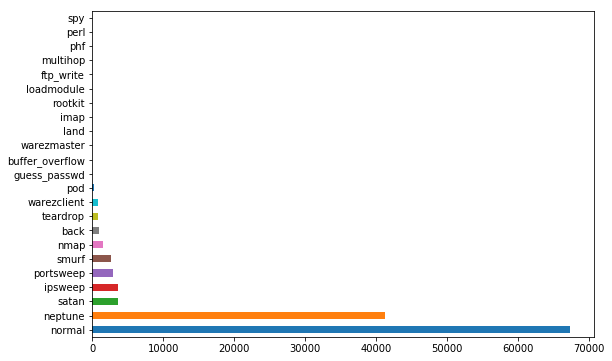

In [20]:
train['attack_type'].value_counts().plot(kind = 'barh')
plt.show()

In [21]:
len(train['attack_type'].value_counts()) # There are 22 Unique attack types + 1 normal in Training Data

23

In [22]:
# Several of the above attack types can be grouped into 5 - different categories
# Instead of doing a 23-class classification, we will do only 5-class classification.

**Lets read a file which maps different attack types with different categories**

In [23]:
attack_mapping = pd.read_csv('training_attack_types.txt', sep = ' ', header = None)
attack_mapping.head()

,0,1
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [24]:
attack_mapping[1].value_counts()

r2l      15
dos      11
u2r       8
probe     7
Name: 1, dtype: int64

* dos: A DoS attack is a type of attack in which the hacker makes a
computing or memory resources too busy or too full to serve
legitimate networking requests and hence denying users
access to a machine
* u2r: These attacks are exploitations in which the hacker starts off
on the system with a normal user account and attempts to
abuse vulnerabilities in the system in order to gain super user
privileges e.g. perl, xterm.
* Probing: It is an attack in which the hacker scans a machine or a
networking device in order to determine weaknesses or
vulnerabilities that may later be exploited so as to
compromise the system. This technique is commonly used in
data mining e.g. saint, portsweep, mscan, nmap etc..
* r2l: A remote to user attack is
an attack in which a user sends packets to a machine over the
internet, which they does not have access to in order to expose
the machines vulnerabilities and exploit privileges which a
local user would have on the computer 

In [25]:
attack_mapping = dict(attack_mapping.values) # Converted the attack mapping into a dictionary
attack_mapping['normal'] = 'benign'
attack_mapping

{'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe',
 'normal': 'benign'}

In [26]:
len(attack_mapping) 
# This mapping file has 40 unique types of attacks. But the training data has 23 unique ones

40

**Lets create a new column called attack_category**

In [28]:
train['attack_type'].head(3)

0     normal
1     normal
2    neptune
Name: attack_type, dtype: object

In [29]:
train['attack_category'] = train['attack_type'].apply(lambda x: attack_mapping[x])
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,benign


In [30]:
train['attack_category'].value_counts() 
# Now we can do 5-class classification on the 'attack_category' column which will be our target variable

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

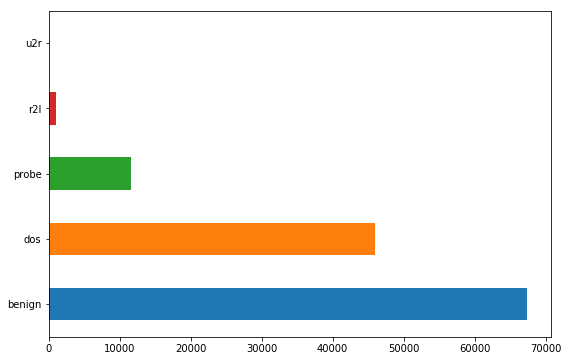

In [31]:
train['attack_category'].value_counts().plot(kind = 'barh')
plt.show()

**Lets see the unique attack types in test data**

In [32]:
len(test['attack_type'].value_counts()) # There are 38 attack types (37 attack + 1 normal)

38

**Creating a new attack_category column for test data**

In [33]:
test['attack_category'] = test['attack_type'].apply(lambda x: attack_mapping[x])
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,benign
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,probe


In [34]:
test['attack_category'].value_counts() 

benign    9711
dos       7636
r2l       2574
probe     2423
u2r        200
Name: attack_category, dtype: int64

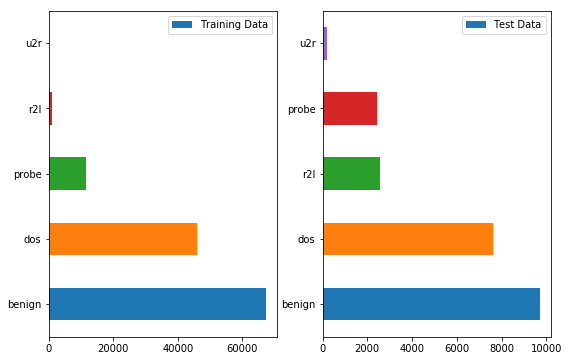

In [36]:
fig, ax = plt.subplots(1,2)
train['attack_category'].value_counts().plot(kind = 'barh', ax = ax[0], label = 'Training Data')
ax[0].legend()

test['attack_category'].value_counts().plot(kind = 'barh', ax = ax[1], label = 'Test Data')
ax[1].legend()
plt.show()

In [37]:
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,dos


In [38]:
test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,benign


**Lets see the dtype of each column**

In [39]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
        'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
        'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'dst_host_count',
        'dst_host_srv_count'],
       dtype='object'),
 dtype('float64'): Index(['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
       dtype='object'),
 dtype('O'): Index(['protocol_type', 'service', 'flag', 'attack_type', 'attack_category'], dtype='object')}

In [40]:
test.columns.to_series().groupby(test.dtypes).groups

{dtype('int64'): Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
        'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
        'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'dst_host_count',
        'dst_host_srv_count'],
       dtype='object'),
 dtype('float64'): Index(['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
       dtype='object'),
 dtype('O'): Index(['protocol_type', 'service', 'flag', 'attack_type', 'attack_category'], dtype='object')}

**Storing categorical (nominal) column names in cat_cols**

In [41]:
cat_cols = list(train.columns[train.dtypes == object])
cat_cols 

['protocol_type', 'service', 'flag', 'attack_type', 'attack_category']

In [42]:
train['protocol_type'].value_counts() # 3 unique kinds of values for 'protocol_type'

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [43]:
test['protocol_type'].value_counts()

tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [44]:
len(train['service'].value_counts()) # 70 unique values for 'service' in training data

70

In [45]:
len(test['service'].value_counts()) # 64 unique values for 'service' in test data

64

In [46]:
len (train['flag'].value_counts()) # 11 unique values for 'flag' in training data

11

In [47]:
len (test['flag'].value_counts()) # 11 unique values for 'flag' in test data

11

In [48]:
# As we saw above, the number of unique values were different for test data
# ..compared to train for the 'service' variable. We may have to do many preprocessing steps
#...for these. So its better to combine train/test for now, and examine them as a one datset
# makes it easier..

**Combining training and test datasets**

In [49]:
combined = pd.concat([train, test] )
combined.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,dos


In [50]:
combined.shape

(148517, 43)

In [51]:
combined['attack_category'].value_counts()

benign    77054
dos       53563
probe     14079
r2l        3569
u2r         252
Name: attack_category, dtype: int64

**Checking to see if there any features with binary values**

In [52]:
combined.nunique()[combined.nunique() <= 2]

land                 2
logged_in            2
root_shell           2
num_outbound_cmds    1
is_host_login        2
is_guest_login       2
dtype: int64

In [53]:
bin_cols = list(combined.nunique()[combined.nunique() <= 2].index)
bin_cols
# one of these features 'num_outbound_cmds' has only one value. what does this mean???

['land',
 'logged_in',
 'root_shell',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

In [54]:
# In the paper is says that another feature 'su_attempted' is binary.

In [55]:
combined['su_attempted'].value_counts() # but here it doesnt look like that.

0    148433
2        61
1        23
Name: su_attempted, dtype: int64

In [56]:
combined['su_attempted'].replace(2, 0, inplace=True) # replacing 2 with 0

In [57]:
bin_cols = list(combined.nunique()[combined.nunique() <= 2].index)
bin_cols

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

In [58]:
combined.nunique().sort_values() # lets see number of unique values in all features

num_outbound_cmds                  1
is_guest_login                     2
is_host_login                      2
su_attempted                       2
land                               2
root_shell                         2
logged_in                          2
protocol_type                      3
wrong_fragment                     3
num_shells                         4
urgent                             4
attack_category                    5
num_failed_logins                  6
num_access_files                  10
flag                              11
hot                               29
num_file_creations                36
attack_type                       40
service                           70
dst_host_srv_diff_host_rate       75
srv_diff_host_rate                87
num_root                          91
srv_serror_rate                   94
srv_rerror_rate                   95
num_compromised                   96
rerror_rate                       98
serror_rate                       99
d

In [59]:
combined['wrong_fragment'].value_counts() # should we treat this as continuous or categorical?

0    147327
3       929
1       261
Name: wrong_fragment, dtype: int64

In [60]:
combined['urgent'].value_counts() #should we treat this as continuous or categorical?

0    148498
1        10
2         7
3         2
Name: urgent, dtype: int64

In [61]:
# Lets read the feature-names file that came with this dataset

In [62]:
ftype = pd.read_csv('feature-names.txt', sep = ':', header = None, names = ['feature', 'type'])
ftype.head()

,feature,type
0,duration,continuous.
1,protocol_type,symbolic.
2,service,symbolic.
3,flag,symbolic.
4,src_bytes,continuous.


In [63]:
ftype['type'].value_counts()

 continuous.    34
 symbolic.       7
Name: type, dtype: int64

In [64]:
ftype[ftype['type'] == ' symbolic.']['feature'].tolist() # list of symbolic features

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'is_host_login',
 'is_guest_login']

In [65]:
cat_cols # These are the categorical wich we know of. 
# 'attack' variables are Target variables. we will use only 'attack_category'

['protocol_type', 'service', 'flag', 'attack_type', 'attack_category']

In [66]:
bin_cols

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

In [67]:
combined['root_shell'].value_counts() 
# root_shell is not in listed as symbolic in the file. But it clearly looks like one. 

0    148293
1       224
Name: root_shell, dtype: int64

In [68]:
num_cols = list(set(combined.columns) - set(cat_cols) - set(bin_cols))
len(num_cols)

31

In [69]:
len(bin_cols)

7

In [70]:
len(cat_cols)

5

In [71]:
len(combined.columns)

43

In [72]:
cat_cols

['protocol_type', 'service', 'flag', 'attack_type', 'attack_category']

In [73]:
cat_cols.remove('attack_type')
cat_cols.remove('attack_category')
len(cat_cols)

3

## 3. More Data Preparation

In [74]:
combined['num_outbound_cmds'].value_counts() # It seem this variable just has one value which is 0

0    148517
Name: num_outbound_cmds, dtype: int64

In [75]:
combined.drop('num_outbound_cmds', axis = 1, inplace=True) # dropping 'num_outbound_cmds'

In [76]:
# lets remove the 'num_outbound_cmds' from the bin_cols list as well.

In [77]:
bin_cols

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

In [78]:
bin_cols.remove('num_outbound_cmds')
bin_cols

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login']

**Lets seperate independent variables and target variables**

In [79]:
y = combined['attack_category']
y.head(3)

0    benign
1    benign
2       dos
Name: attack_category, dtype: object

In [80]:
X = combined.drop(['attack_category','attack_type'], axis=1)
X.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0


In [81]:
# We have some categorical (nominal) variables, binary numeric variables, and numeric variables.
# atleast for categorical variables, we need to convert them into numeric for certain algorithms

**Converting independent categorical variables into numeric**

In [82]:
cat_cols

['protocol_type', 'service', 'flag']

In [83]:
X = pd.get_dummies(X, columns = cat_cols, drop_first=True)
X.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
combined['protocol_type'].value_counts() # Protocol_type had three unique type of values.

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

In [85]:
[col for col in X.columns if 'protocol' in col] 
# when we used pd.get_dummy(), it converted 'protocol_type' into two columns filled with 0 and 1's

['protocol_type_tcp', 'protocol_type_udp']

**Lets seperate train/test from X and y**

In [86]:
X_train = X[:len(train)]
y_train = y[:len(train)]
print (X_train.shape)
print (y_train.shape)
print ('shape of train before dummy conversion', train.shape)

(125973, 118)
(125973,)
shape of train before dummy conversion (125973, 43)


In [87]:
X_test = X[len(train):]
y_test = y[len(train):]
print (X_test.shape)
print (y_test.shape)
print ('shape of test data before dummy conversion', test.shape)

(22544, 118)
(22544,)
shape of test data before dummy conversion (22544, 43)


**Lets look at some statistics**

In [88]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# There is wide variation in the ranges of features. So lets scale the data

### 3.1 Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])

X_test[num_cols] =  scaler.transform(X_test[num_cols])

In [91]:
X_train.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [92]:
X_train[bin_cols].head()

,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [93]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,3.916911e-16,2.559517e-16,-3.472529e-16,0.000198,9.708754e-16,3.109539e-15,-7.629865e-15,8.220883e-16,0.395736,-2.468094e-15,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
X_train.head(3) # 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [95]:
X_test.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,1,0,0,0,0,0,0,0,0,0
1,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,1,0,0,0,0,0,0,0,0,0
2,-0.109481,-0.005551,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,0,1,0


In [96]:
# Now our data is ready for Machine Learning Models.

## 4. Implimenting Machine Learning Models

### 4.1 Decision trees

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss, classification_report

In [98]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

**Predictions, scores, errors on training data**

In [99]:
ypred_train_dt = dt.predict(X_train)
print ('Predictions on Training Data')
print (confusion_matrix(y_train, ypred_train_dt))
print ('Accuracy:', accuracy_score(y_train, ypred_train_dt))
print ('Error:', zero_one_loss(y_train, ypred_train_dt))

Predictions on Training Data
[[67343     0     0     0     0]
 [    5 45922     0     0     0]
 [    1     0 11655     0     0]
 [    0     0     0   995     0]
 [    1     0     0     0    51]]
Accuracy: 0.999944432537131
Error: 5.5567462869055007e-05


**Predictions, scores, errors on test data**

In [100]:
ypred_test_dt = dt.predict(X_test)
print ('Predictions on Test Data')
print (pd.DataFrame(confusion_matrix(y_test, ypred_test_dt), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:',accuracy_score(y_test, ypred_test_dt))
print ('Error:', zero_one_loss(y_test, ypred_test_dt))

Predictions on Test Data
         pbenign  pdos  pprobe  ppr2l  pu2r
abenign     9356    60     291      4     0
ados        1468  6071      97      0     0
arobe        731   212    1480      0     0
ar2l        2308     0      11    250     5
au2r         176     0       2      5    17
Accuracy: 0.7617991483321505
Error: 0.23820085166784954


In [101]:
y_test.value_counts()

benign    9711
dos       7636
r2l       2574
probe     2423
u2r        200
Name: attack_category, dtype: int64

In [102]:
print (classification_report(y_test, ypred_test_dt))

              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.80      0.87      7636
       probe       0.79      0.61      0.69      2423
         r2l       0.97      0.10      0.18      2574
         u2r       0.77      0.09      0.15       200

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.83      0.51      0.53     22544
weighted avg       0.81      0.76      0.73     22544



In [103]:
# Clearly decision tress with default parameters is overfitting

### 4.2 Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
ypred_train_logr = logr.predict(X_train)
ypred_train_logr[0:5]

array(['benign', 'benign', 'dos', 'benign', 'benign'], dtype=object)

**Predictions, scores, errors on training data**

In [107]:
ypred_train_logr = logr.predict(X_train)
print ('Predictions on Train Data for Logistic Regression')
print (pd.DataFrame(confusion_matrix(y_train, ypred_train_logr), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:', accuracy_score(y_train, ypred_train_logr))
print ('Error:', zero_one_loss(y_train, ypred_train_logr))

Predictions on Train Data for Logistic Regression
         pbenign   pdos  pprobe  ppr2l  pu2r
abenign    66471    257     390    223     2
ados         832  45093       2      0     0
arobe        554     83   11018      1     0
ar2l         304      1       6    684     0
au2r          25      1       0      9    17
Accuracy: 0.9786462178403309
Error: 0.0213537821596691


**Predictions, scores, errors on test data**

In [108]:
ypred_test_logr = logr.predict(X_test)
print ('Predictions on Test Data for Logistic Regression')
print (pd.DataFrame(confusion_matrix(y_test, ypred_test_logr), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:', accuracy_score(y_test, ypred_test_logr))
print ('Error:', zero_one_loss(y_test, ypred_test_logr))

Predictions on Test Data for Logistic Regression
         pbenign  pdos  pprobe  ppr2l  pu2r
abenign     9013   357     337      2     2
ados        1632  5989      15      0     0
arobe        696   128    1572     27     0
ar2l        2526     1       4     43     0
au2r         188     4       0      2     6
Accuracy: 0.7373580553584103
Error: 0.26264194464158974


In [109]:
# The algorithms are not able to catch most of the r2l, u2r cases. 
# This is because it is an imbalanced dataset

In [110]:
y_train.value_counts()

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

### 4.3 Sampling Techniques

### Over Sampling

In [111]:
# pip install -U imbalanced-learn   (on anaconda command prompt, IF NOT INSTALLED ALREADY)

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
overs = SMOTE(sampling_strategy = 'auto', random_state=10)
X_train_os, y_train_os = overs.fit_sample(X_train, y_train)
X_train_os = pd.DataFrame(X_train_os, columns = X_train.columns)
y_train_os = pd.Series(y_train_os)
# with auto, minority class is oversampled to be the same class as majority class
# SMOTE returns X_train_os, y_train_os as numpy arrays

In [114]:
X_train_os.shape # shape after sampling

(336715, 118)

In [115]:
X_train.shape #shape before sampling

(125973, 118)

In [116]:
y_train_os.value_counts() # we can see that minority classes have been oversmapled

dos       67343
u2r       67343
probe     67343
benign    67343
r2l       67343
dtype: int64

**Lets fit Decision Trees again on this oversampled data**

In [117]:
dt_os = DecisionTreeClassifier(random_state=10)
dt_os.fit(X_train_os, y_train_os)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

**Predictions, accuracies, and error on test data with DT after over sampling**

In [ ]:
ypred_test_dt_os = dt_os.predict(X_test)
print ('Predictions on Test Data for Decision Trees, after over sampling')
print (pd.DataFrame(confusion_matrix(y_test, ypred_test_dt_os), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:', accuracy_score(y_test, ypred_test_dt_os))
print ('Error:', zero_one_loss(y_test, ypred_test_dt_os))

### Random Undersampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
runders = RandomUnderSampler(random_state=10)
X_train_rus, y_train_rus = runders.fit_sample(X_train, y_train)

In [ ]:
pd.Series(y_train_rus).value_counts() 

In [ ]:
# It undersampled everything to the minority class. 
# We dont want this, because we will lose out valuable information

In [ ]:
# We can proceed with the oversampled data, since there was some improvement in the accuracy

### 4.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf_os = RandomForestClassifier(random_state=10)

rf.fit(X_train, y_train)
rf_os.fit(X_train_os, y_train_os)

In [ ]:
ypred_test_rf = rf.predict(X_test)
ypred_test_rf_os = rf_os.predict(X_test)

print ('Predictions on Test Data for Random Forest')
print ('Accuracy on actual data:', accuracy_score(y_test, ypred_test_rf))
print ('Accuracy on oversampled model:', accuracy_score(y_test, ypred_test_rf_os))

### 4.5 Gradientboosting Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(random_state=10)
gbt.fit(X_train, y_train)

gbt_os = GradientBoostingClassifier(random_state=10)
gbt_os.fit(X_train_os, y_train_os)

In [ ]:
ypred_test_gbt = gbt.predict(X_test)
ypred_test_gbt_os = gbt_os.predict(X_test)

print ('Predictions on Test Data for Gradient Boosting GTrees')
print ('Accuracy on actual data:', accuracy_score(y_test, ypred_test_gbt))
print ('Accuracy on oversampled model:', accuracy_score(y_test, ypred_test_gbt_os))

In [ ]:
# Gradient Boosting builds one tree at a time, where each new tree helps in correcting errors made by previously trained tree
# Better for unbalanced datasets

### 4.6 Cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

**DT**

In [ ]:
cross_val_score(dt, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv = 5).mean()

In [ ]:
cross_val_score(dt_os, pd.concat([X_train_os, X_test]), pd.concat([y_train_os, y_test]), cv = 5).mean()

**RF**

In [ ]:
cross_val_score(rf, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv = 5).mean()

In [ ]:
cross_val_score(rf_os, pd.concat([X_train_os, X_test]), pd.concat([y_train_os, y_test]), cv = 5).mean()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtr, Xte, ytr, yte = train_test_split(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

In [ ]:
rf2 = RandomForestClassifier(random_state=5)
rf2.fit(Xtr, ytr)

ypred_te_rf2 = rf2.predict(Xte)
print ('Predictions on Test Data for Decision Trees, after combining data and splitting again randomly')
print (pd.DataFrame(confusion_matrix(yte, ypred_te_rf2), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:', accuracy_score(yte, ypred_te_rf2))
print ('Error:', zero_one_loss(yte, ypred_te_rf2))

### 4.7 GridSearchCV (Optional)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
params = { "n_estimators" : [50, 100, 200], 
            "max_depth" : [3, 10, 30],
}
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
rf_gs = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1), param_grid = params, cv = 5, n_jobs = -1, scoring = "accuracy")
rf_gs.fit(Xtr, ytr)

In [ ]:
rf_gs.best_params_

In [ ]:
rf_gs.best_score_

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 200, max_depth = 30, random_state=5)
rf2.fit(Xtr, ytr)

ypred_te_rf2 = rf2.predict(Xte)
print ('Predictions on Test Data for Decision Trees, after combining data and splitting again randomly')
print (pd.DataFrame(confusion_matrix(yte, ypred_te_rf2), 
                    index = ['abenign', 'ados', 'arobe', 'ar2l', 'au2r'],
                    columns = ['pbenign', 'pdos', 'pprobe', 'ppr2l', 'pu2r']))
print ('Accuracy:', accuracy_score(yte, ypred_te_rf2))
print ('Error:', zero_one_loss(yte, ypred_te_rf2))